In [1]:
import funPyModeling

ModuleNotFoundError: No module named 'funPyModeling'

In [4]:
dir(funPyModeling)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'coord_plot',
 'corr_pair',
 'freq_tbl',
 'freq_tbl_logic',
 'num_vars',
 'profiling_num',
 'status',
 'todf']

In [2]:
from funPyModeling import freq_tbl_logic

ModuleNotFoundError: No module named 'funPyModeling'

In [9]:
_freq_tbl_logic

NameError: name '_freq_tbl_logic' is not defined

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

In [24]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

[   sepal_length  sepal_width  petal_length  petal_width     species
 0         5.006        3.428         1.462        0.246      setosa
 1         5.936        2.770         4.260        1.326  versicolor
 2         6.588        2.974         5.552        2.026   virginica,
    sepal_length  sepal_width  petal_length  petal_width     species
 0      0.000000      1.00000      0.000000     0.000000      setosa
 1      0.587863      0.00000      0.684108     0.606742  versicolor
 2      1.000000      0.31003      1.000000     1.000000   virginica]

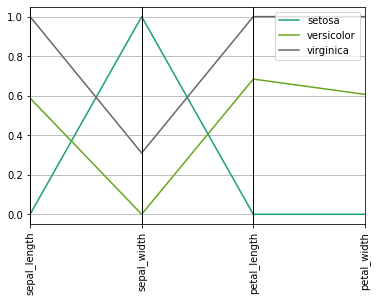

In [23]:
import seaborn as sns

iris = sns.load_dataset('iris')

coord_plot(iris, 'species')

In [14]:
import pandas as pd
import numpy as np

In [11]:
def status(data):
    if isinstance(data, pd.Series):
        data2=pd.DataFrame(data)
    else:
        data2=data
        
    if(isinstance(data, np.ndarray)):
        data2=pd.DataFrame(data2)

        
    # total de rows
    tot_rows=len(data2)
    
    # total of nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [13]:
status(todf([12,2,1]))

NameError: name 'todf' is not defined

In [27]:
import seaborn as sns
iris = sns.load_dataset('iris')


SyntaxError: invalid syntax (<ipython-input-27-e472e60b758b>, line 1)

In [30]:
def todf(data):
    """
    It converts almost any object to pandas dataframe. It supports: 1D/2D list, 1D/2D arrays, pandas series. If the object containts +2D it returns an error.
    Parameters:
    -----------
    data: data
    
    Returns:
    --------
    A pandas dataframe.

    Example:
    --------
    >> from numpy import array

    # Different case study:
    >> list_1d = [11, 12, 5, 2] 
    >> todf(list_1d)
    >> list_2d = [[11, 12, 5, 2], [15,24, 6,10], [10, 8, 12, 5], [12,15,8,6]]
    >> todf(list_2d)
    >> list_3d = [[[11, 12, 5, 2], [15,24, 6,10], [10, 8, 12, 5], [12,15,8,6]]]
    >> todf(list_3d)
    >> array_1d = array(list_1d)
    >> todf(array_1d)
    >> array_2d = array(list_2d)
    >> todf(array_2d)
    >> pd_df=pd.DataFrame({'v1':[11, 12, 5, 2], 'v2':[15,24, 6,10]}) # ok
    >> todf(pd_df)
    >> pd_series=pd_df.v1
    """
    if isinstance(data, list):
        data=np.array(data)

    if(len(data.shape))>2:
        raise Exception("I live in flattland! (can't handle objects with more than 2 dimensions)") 

    if isinstance(data, pd.Series):
        data2=pd.DataFrame({data.name: data})
    elif isinstance(data, np.ndarray):
        if(data.shape==1):
            data2=pd.DataFrame({'var': data})
        else:
            data2=pd.DataFrame(data)
    else: 
        data2=data
        
    return data2



In [68]:
def corr_pair(data, method='pearson'):
    """
    Parameters:
    -----------
    data: pandas data frame
    
    Returns:
    --------
    A pandas dataframe containing pairwaise correlation

    Example:
    --------
    >> import seaborn as sns
    >> iris = sns.load_dataset('iris')
    >> # dataframe as input
    >> status(iris)
    >> # single columns:
    >> status(iris['species'])
    """
    d_cor=data.corr(method)

    d_cor2=d_cor.reset_index() # generates index as column

    d_long=d_cor2.melt(id_vars='index') # to long format, each row 1 var

    d_long.columns=['v1', 'v2', 'R']
    
    d_long[['R2']]=d_long[['R']]**2
    
    d_long2=d_long.query("v1 != v2") # don't need the auto-correlation

    return(d_long2)


In [102]:
import seaborn as sns
tips=sns.load_dataset('tips')

freq_tbl(tips['sex'])


,sex,frequency,percentage,cumulative_perc
0,Male,157,0.643443,0.643443
1,Female,87,0.356557,1.000000


In [103]:
status(tips)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,total_bill,0,0.0,0,0.0,229,float64
1,tip,0,0.0,0,0.0,123,float64
2,sex,0,0.0,0,0.0,2,category
3,smoker,0,0.0,0,0.0,2,category
4,day,0,0.0,0,0.0,4,category
5,time,0,0.0,0,0.0,2,category
6,size,0,0.0,0,0.0,6,int64


In [110]:
todf??

Signature: todf(data)
Source:   
def todf(data):
    """
    It converts almost any object to pandas dataframe. It supports: 1D/2D list, 1D/2D arrays, pandas series. If the object containts +2D it returns an error.
    Parameters:
    -----------
    data: data
    
    Returns:
    --------
    A pandas dataframe.

    Example:
    --------
    >> from numpy import array

    # Different case study:
    >> list_1d = [11, 12, 5, 2] 
    >> todf(list_1d)
    >> list_2d = [[11, 12, 5, 2], [15,24, 6,10], [10, 8, 12, 5], [12,15,8,6]]
    >> todf(list_2d)
    >> list_3d = [[[11, 12, 5, 2], [15,24, 6,10], [10, 8, 12, 5], [12,15,8,6]]]
    >> todf(list_3d)
    >> array_1d = array(list_1d)
    >> todf(array_1d)
    >> array_2d = array(list_2d)
    >> todf(array_2d)
    >> pd_df=pd.DataFrame({'v1':[11, 12, 5, 2], 'v2':[15,24, 6,10]}) # ok
    >> todf(pd_df)
    >> pd_series=pd_df.v1
    """
    if isinstance(data, list):
        data=np.array(data)

    if(len(data.shape))>2:
        raise Exce

In [76]:
tips = sns.load_dataset("tips")

In [78]:
def _freq_tbl_logic(var, name):
    """
    For internal use. Related to `freq_tbl`.

    Parameters:
    -----------
    
    Returns:
    --------

    Example:
    --------

    """
    cnt=var.value_counts()
    df_res=pd.DataFrame({'frequency': var.value_counts(), 'percentage': var.value_counts()/len(var)})
    df_res.reset_index(drop=True)
    
    df_res[name] = df_res.index
    
    df_res=df_res.reset_index(drop=True)
    
    df_res['cumulative_perc'] = df_res.percentage.cumsum()/df_res.percentage.sum()
    
    df_res=df_res[[name, 'frequency', 'percentage', 'cumulative_perc']]
    
    return df_res



def freq_tbl(data):
    """
    Frequency table for categorical variables. It retrieves the frequency, perrcentage and cummulative percentage for each categorical variables (excluding the numerical ones).

    Parameters:
    -----------
    data: pandas series/dataframe, numpy 1D/2D array
    
    Returns:
    --------
    If a single variable is passed, then it returns the table with the results (useful to be used in a processes and take actions based on the result.).
    If it contains more than one varible, it will print in the console the result for all the categorical variables

    Example:
    --------
    

    """
    data=todf(data)
    
    cat_v=cat_vars(data)
    
    if(len(cat_v)>1):
        for col in cat_v:
            print(_freq_tbl_logic(data[col], name=col))
            print('\n----------------------------------------------------------------\n')
        return cat_v
    else:
        return _freq_tbl_logic(data.iloc[:,0], name=data.columns[0])
    
    


In [93]:
def cat_vars(data, exclude_var=None):
    """
    Returns the categoric variable names. Useful to use with pipelines or any other method in which we need to keep categorical variables. It `exclude_var` can be a list with the variable names to skip in the result. Useful when we want to skip the target variable (i.e. in a data transformation). 
    It's also available for numeric variables in the function `num_vars()`
    
    Parameters:
    -----------
    data: pandas dataframe
    exclude_var: list of variable names to exclude from the result
    
    Returns:
    --------
    A list with all the categoric variable names.

    Example:
    --------
    >> import seaborn as sns
    >> iris = sns.load_dataset('iris')
    >> cat_vars(iris)
    """
    cat_v = data.select_dtypes(include=['object','category']).columns
    if exclude_var is not None: 
        cat_v=cat_v.drop(exclude_var)
    return cat_v



In [94]:
cat_v = tips.select_dtypes(include=['object','category']).columns

In [95]:
cat_v

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [98]:
profiling_num(tips)

NameError: name 'profiling_num' is not defined

In [97]:
freq_tbl(tips)

      sex  frequency  percentage  cumulative_perc
0    Male        157    0.643443         0.643443
1  Female         87    0.356557         1.000000

----------------------------------------------------------------

  smoker  frequency  percentage  cumulative_perc
0     No        151    0.618852         0.618852
1    Yes         93    0.381148         1.000000

----------------------------------------------------------------

    day  frequency  percentage  cumulative_perc
0   Sat         87    0.356557         0.356557
1   Sun         76    0.311475         0.668033
2  Thur         62    0.254098         0.922131
3   Fri         19    0.077869         1.000000

----------------------------------------------------------------

     time  frequency  percentage  cumulative_perc
0  Dinner        176    0.721311         0.721311
1   Lunch         68    0.278689         1.000000

----------------------------------------------------------------



Index(['sex', 'smoker', 'day', 'time'], dtype='object')